In [50]:
import pandas as pd
df=pd.read_csv("titanic-passengers.csv",delimiter=";")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [51]:
#Number of missing values by features
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [52]:
#Replacing missing numerical values of 'Age' by its Mean
df.fillna(df['Age'].mean(), inplace=True)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [54]:
#Delete Features
del df['Cabin']
del df['Name']
del df['Ticket']
del df['PassengerId']


In [55]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    object 
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 55.8+ KB


In [56]:
#Feature engineering: 
#df['Survived']=df['Survived'].map({'Yes' : 1,'No' : 0})
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['Survived']=encoder.fit_transform(df['Survived'])
df['Sex']=encoder.fit_transform(df['Sex'])
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,2,1,28.000000,0,0,13.0000,S
1,0,3,1,25.000000,0,0,7.6500,S
2,0,3,1,20.000000,0,0,7.8542,S
3,0,3,0,29.000000,0,4,21.0750,S
4,0,1,1,31.000000,1,0,52.0000,S
...,...,...,...,...,...,...,...,...
886,1,2,0,14.000000,1,0,30.0708,C
887,0,3,1,22.000000,0,0,7.2292,C
888,0,3,0,30.000000,0,0,8.6625,S
889,0,3,1,29.699118,0,0,7.8958,S


In [57]:
df['Embarked'].value_counts()

S                    644
C                    168
Q                     77
29.69911764705882      2
Name: Embarked, dtype: int64

In [58]:
#Another way to get the indexes of the rows
i = df[(df['Embarked'] == 29.69911764705882)].index
print(i)

Int64Index([396, 399], dtype='int64')


In [59]:
 #Drop them
#df.drop(396)  
#df.drop(399)  

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int32  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int32(2), int64(3), object(1)
memory usage: 48.9+ KB


In [61]:
df['Embarked']=df['Embarked'].map({'S' : 3,'C' : 2, 'Q' : 1,29.69911764705882: 0 })
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,2,1,28.000000,0,0,13.0000,3
1,0,3,1,25.000000,0,0,7.6500,3
2,0,3,1,20.000000,0,0,7.8542,3
3,0,3,0,29.000000,0,4,21.0750,3
4,0,1,1,31.000000,1,0,52.0000,3
...,...,...,...,...,...,...,...,...
886,1,2,0,14.000000,1,0,30.0708,2
887,0,3,1,22.000000,0,0,7.2292,2
888,0,3,0,30.000000,0,0,8.6625,3
889,0,3,1,29.699118,0,0,7.8958,3


In [62]:
#Correlation
pd.DataFrame(df.corr()['Survived']).sort_values(by='Survived',ascending=False)

,Survived
Survived,1.000000
Fare,0.257307
Parch,0.081629
SibSp,-0.035322
Age,-0.069809
Embarked,-0.118026
Pclass,-0.338481
Sex,-0.543351


In [63]:
#split dataset in features and target variable
feature_cols = ['Sex']
X = df[feature_cols] # Feature
y = df.Survived # Target variable

In [64]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [65]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

In [66]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[129,  15],
       [ 24,  55]], dtype=int64)

In [67]:
#visualizer CM
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Survived')

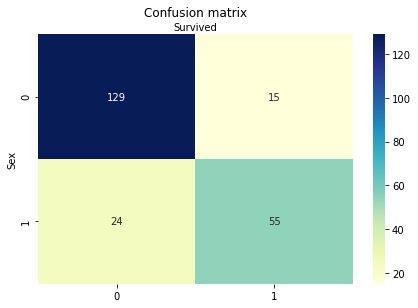

In [73]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Sex')
plt.xlabel('Survived')

In [69]:
#evaluation metric
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8251121076233184
Precision: 0.7857142857142857
Recall: 0.6962025316455697


Sensitivity=TP/(TP+FN) Sensitivity tells us what proportion of the positive class got correctly classified.

A simple example would be to determine what proportion of the actual sick people were correctly detected by the model.

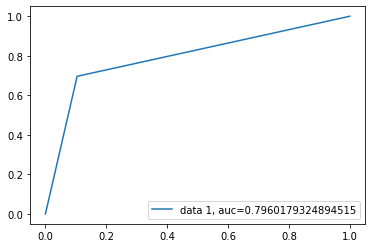

In [72]:
#ROC
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

“Area Under the Curve” (AUC) of “Receiver Characteristic Operator” (ROC)
The Receiver Operator Characteristic (ROC) curve is an evaluation metric for binary classification problems. 
It is a probability curve that plots the TPR against FPR at various threshold values and essentially
separates the ‘signal’ from the ‘noise’.
The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish 
between classes and is used as a summary of the ROC curve.
The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes.
When AUC = 1, then the classifier is able to perfectly distinguish between all the Positive and the Negative class points correctly. 
If, however, the AUC had been 0, then the classifier would be predicting all Negatives as Positives, and all Positives as Negatives.
When 0.5<AUC<1, there is a high chance that the classifier will be able to distinguish the positive class values from the negative class values. 
This is so because the classifier is able to detect more numbers of True positives and True negatives than False negatives and False positives.
When AUC=0.5, then the classifier is not able to distinguish between Positive and Negative class points. 
Meaning either the classifier is predicting random class or constant class for all the data points.
So, the higher the AUC value for a classifier, the better its ability to distinguish between positive and negative classes.

In our case AUC=0,79: 0.5<AUC<1 so there is a high chance that the classifier has distinguished more number of TP (129) and TN (55) than FN(24) and FP(15)